In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/powerconsumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df.head()

Mounted at /content/drive


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [ ]:
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.day_name()
df['Month'] = df.index.month_name()

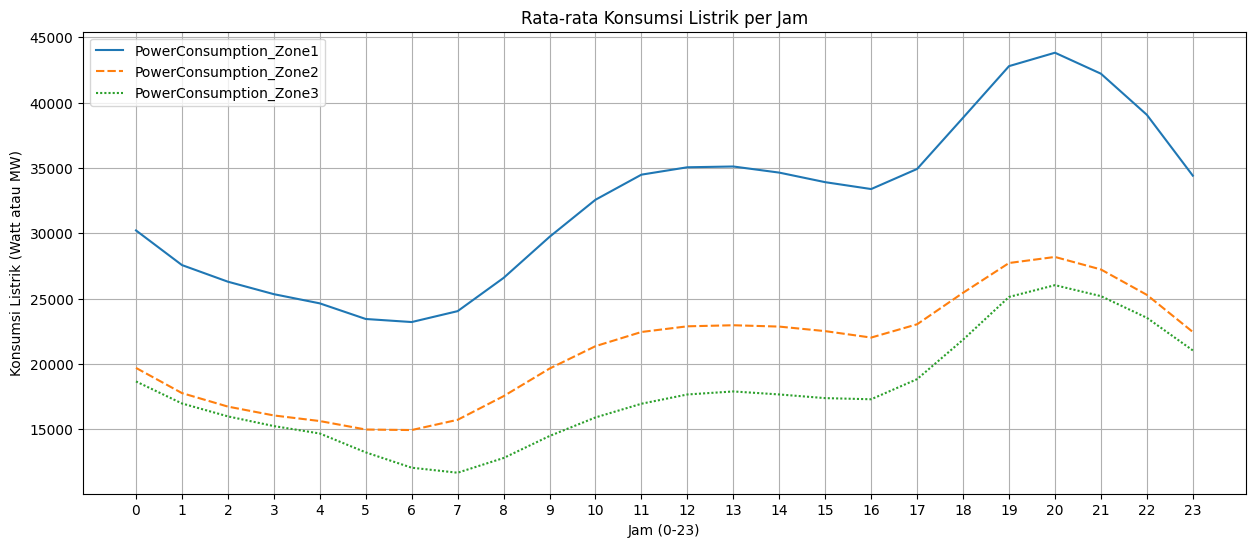

In [ ]:
hourly = df.groupby('Hour')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()

plt.figure(figsize=(15,6))
sns.lineplot(data=hourly)
plt.title('Rata-rata Konsumsi Listrik per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Konsumsi Listrik (Watt atau MW)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

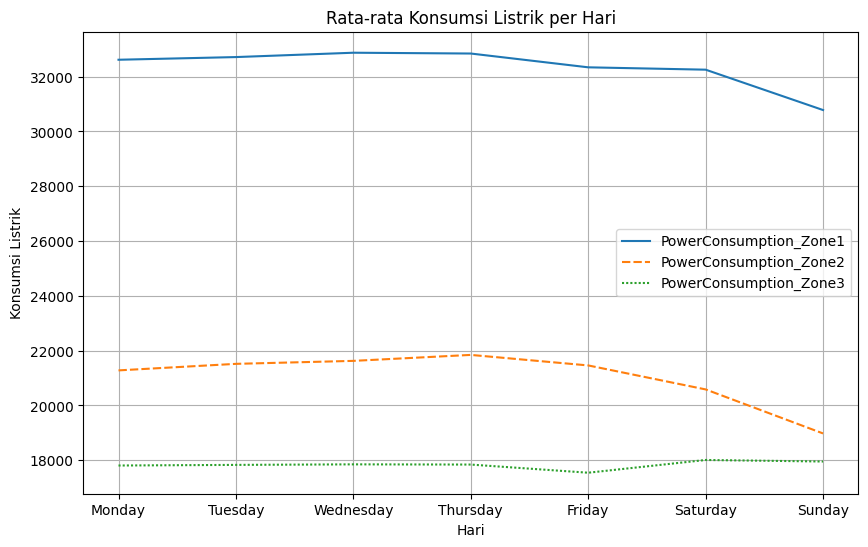

In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly = df.groupby('DayOfWeek')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reindex(weekday_order)

plt.figure(figsize=(10,6))
sns.lineplot(data=weekly)
plt.title('Rata-rata Konsumsi Listrik per Hari')
plt.xlabel('Hari')
plt.ylabel('Konsumsi Listrik')
plt.grid(True)
plt.show()

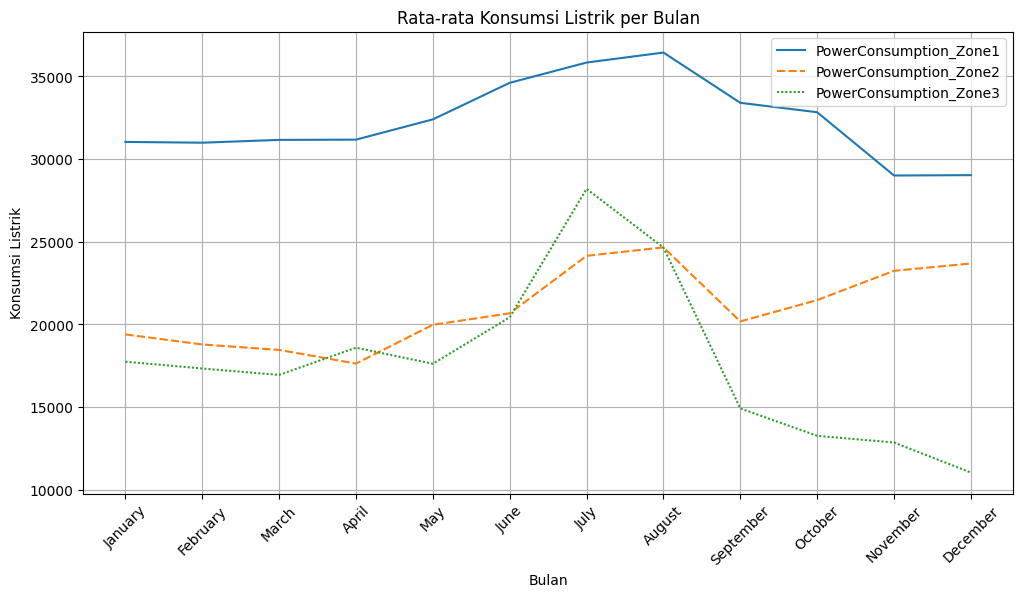

In [ ]:
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly = df.groupby('Month')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reindex(monthly_order)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly)
plt.title('Rata-rata Konsumsi Listrik per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsumsi Listrik')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


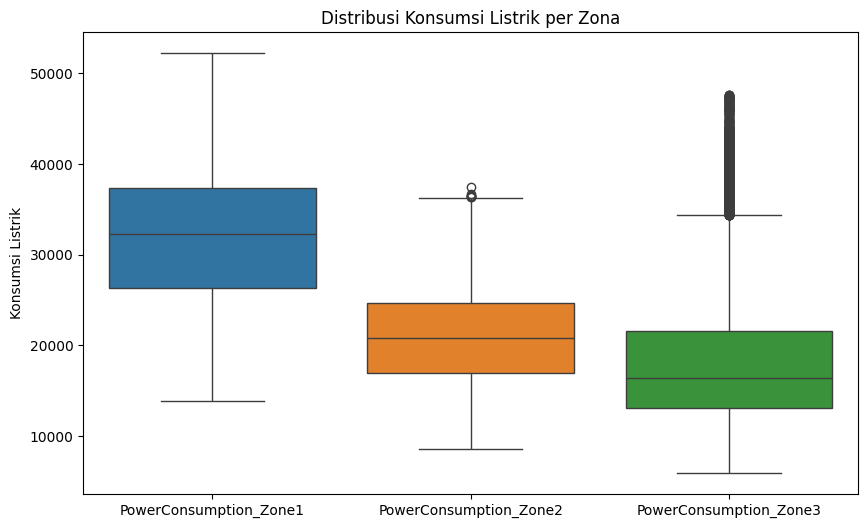

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.title('Distribusi Konsumsi Listrik per Zona')
plt.ylabel('Konsumsi Listrik')
plt.show()

In [ ]:
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
for zone in zones:
    print(f"\nStatistik untuk {zone}:")
    print(f"  Total (Sum)     : {df[zone].sum():,.2f}")
    print(f"  Rata-rata (Mean): {df[zone].mean():,.2f}")
    print(f"  Median          : {df[zone].median():,.2f}")
    print(f"  Modus (Mode)    : {df[zone].mode().iloc[0]:,.2f}")
    print(f"  Minimum         : {df[zone].min():,.2f}")
    print(f"  Maksimum        : {df[zone].max():,.2f}")
    print(f"  Std Dev         : {df[zone].std():,.2f}")


Statistik untuk PowerConsumption_Zone1:
  Total (Sum)     : 1,695,393,977.06
  Rata-rata (Mean): 32,344.97
  Median          : 32,265.92
  Modus (Mode)    : 34,560.00
  Minimum         : 13,895.70
  Maksimum        : 52,204.40
  Std Dev         : 7,130.56

Statistik untuk PowerConsumption_Zone2:
  Total (Sum)     : 1,102,964,156.06
  Rata-rata (Mean): 21,042.51
  Median          : 20,823.17
  Modus (Mode)    : 21,600.00
  Minimum         : 8,560.08
  Maksimum        : 37,408.86
  Std Dev         : 5,201.47

Statistik untuk PowerConsumption_Zone3:
  Total (Sum)     : 934,860,652.34
  Rata-rata (Mean): 17,835.41
  Median          : 16,415.12
  Modus (Mode)    : 17,280.00
  Minimum         : 5,935.17
  Maksimum        : 47,598.33
  Std Dev         : 6,622.17


In [ ]:
stats = df[zones].agg(['sum', 'mean', 'median', 'std', 'min', 'max'])
stats.loc['mode'] = df[zones].mode().iloc[0]
print(stats.T)

                                 sum          mean        median          std  \
PowerConsumption_Zone1  1.695394e+09  32344.970564  32265.920340  7130.562564   
PowerConsumption_Zone2  1.102964e+09  21042.509082  20823.168405  5201.465892   
PowerConsumption_Zone3  9.348607e+08  17835.406218  16415.117470  6622.165099   

                                 min          max     mode  
PowerConsumption_Zone1  13895.696200  52204.39512  34560.0  
PowerConsumption_Zone2   8560.081466  37408.86076  21600.0  
PowerConsumption_Zone3   5935.174070  47598.32636  17280.0  


In [ ]:
total_all_zones = df[zones].sum().sum()
print(f"\n Total Konsumsi Listrik dari Semua Zona: {total_all_zones:,.2f}")


 Total Konsumsi Listrik dari Semua Zona: 3,733,218,785.46


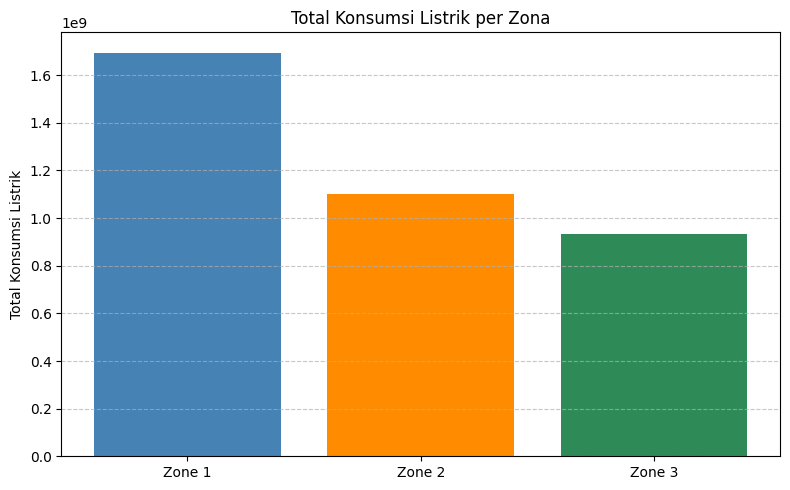

In [ ]:
zones = ['Zone 1', 'Zone 2', 'Zone 3']
totals = [1695393977.06, 1102964156.06, 934860652.34]

plt.figure(figsize=(8, 5))
plt.bar(zones, totals, color=['steelblue', 'darkorange', 'seagreen'])
plt.title('Total Konsumsi Listrik per Zona')
plt.ylabel('Total Konsumsi Listrik')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()e9[]
plt.show()


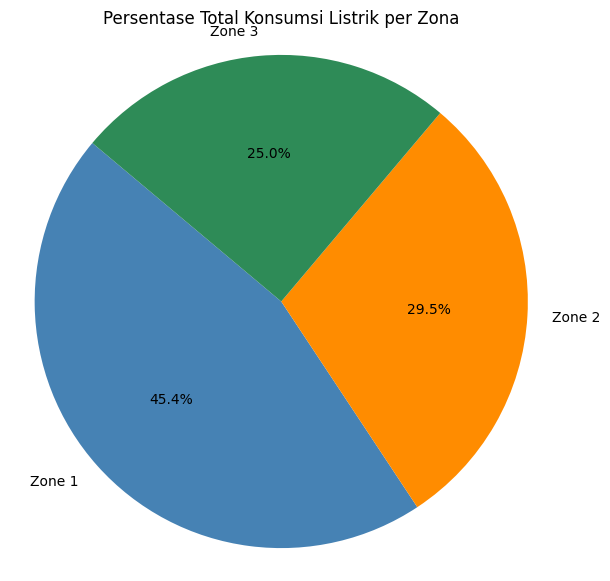

In [ ]:
zones = ['Zone 1', 'Zone 2', 'Zone 3']
totals = [1695393977.06, 1102964156.06, 934860652.34]

plt.figure(figsize=(7, 7))
plt.pie(totals, labels=zones, autopct='%1.1f%%', startangle=140, colors=['steelblue', 'darkorange', 'seagreen'])
plt.title('Persentase Total Konsumsi Listrik per Zona')
plt.axis('equal')
plt.show()

In [ ]:
korelasi = df[['Temperature', 'Humidity', 'WindSpeed',
               'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].corr(method='pearson')

print(korelasi)

                        Temperature  Humidity  WindSpeed  \
Temperature                1.000000 -0.460243   0.477109   
Humidity                  -0.460243  1.000000  -0.135853   
WindSpeed                  0.477109 -0.135853   1.000000   
PowerConsumption_Zone1     0.440221 -0.287421   0.167444   
PowerConsumption_Zone2     0.382428 -0.294961   0.146413   
PowerConsumption_Zone3     0.489527 -0.233022   0.278641   

                        PowerConsumption_Zone1  PowerConsumption_Zone2  \
Temperature                           0.440221                0.382428   
Humidity                             -0.287421               -0.294961   
WindSpeed                             0.167444                0.146413   
PowerConsumption_Zone1                1.000000                0.834519   
PowerConsumption_Zone2                0.834519                1.000000   
PowerConsumption_Zone3                0.750733                0.570932   

                        PowerConsumption_Zone3  
Temperature

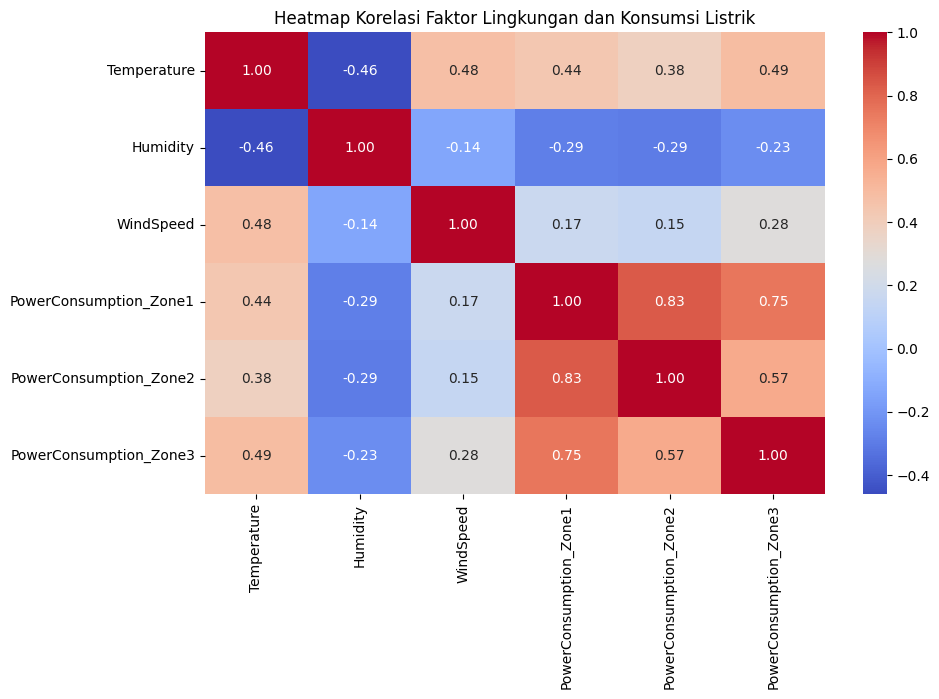

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Faktor Lingkungan dan Konsumsi Listrik')
plt.show()

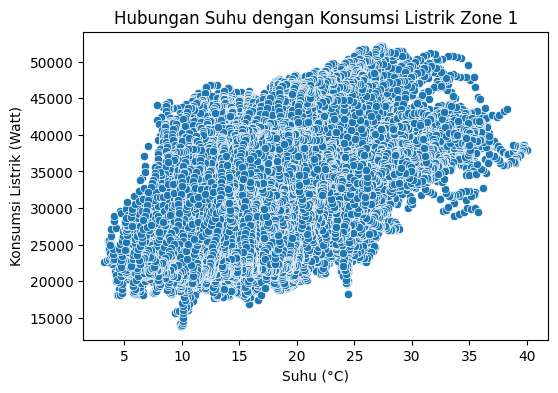

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Temperature', y='PowerConsumption_Zone1')
plt.title('Hubungan Suhu dengan Konsumsi Listrik Zone 1')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsumsi Listrik (Watt)')
plt.show()

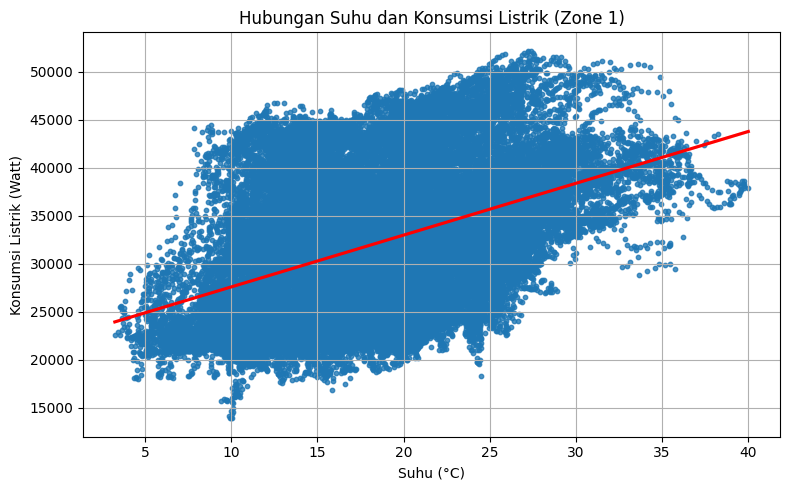

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Temperature', y='PowerConsumption_Zone1', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Hubungan Suhu dan Konsumsi Listrik (Zone 1)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsumsi Listrik (Watt)')
plt.grid(True)
plt.tight_layout()
plt.show()

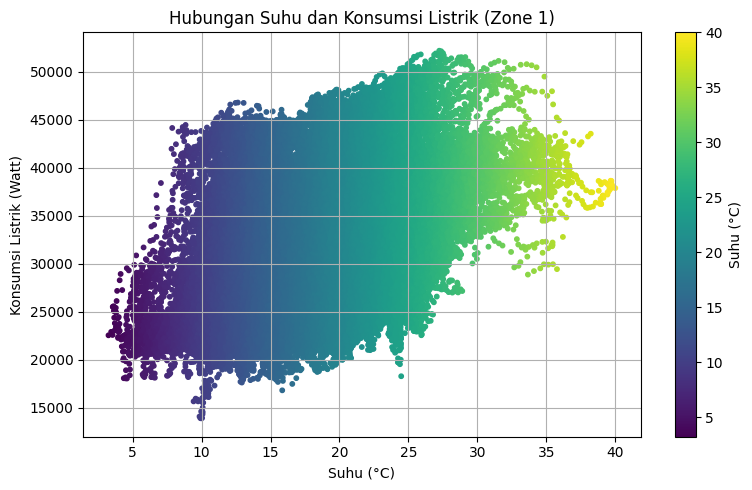

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperature'], df['PowerConsumption_Zone1'], c=df['Temperature'], cmap='viridis', s=10)
plt.colorbar(label='Suhu (°C)')
plt.title('Hubungan Suhu dan Konsumsi Listrik (Zone 1)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsumsi Listrik (Watt)')
plt.grid(True)
plt.tight_layout()
plt.show()

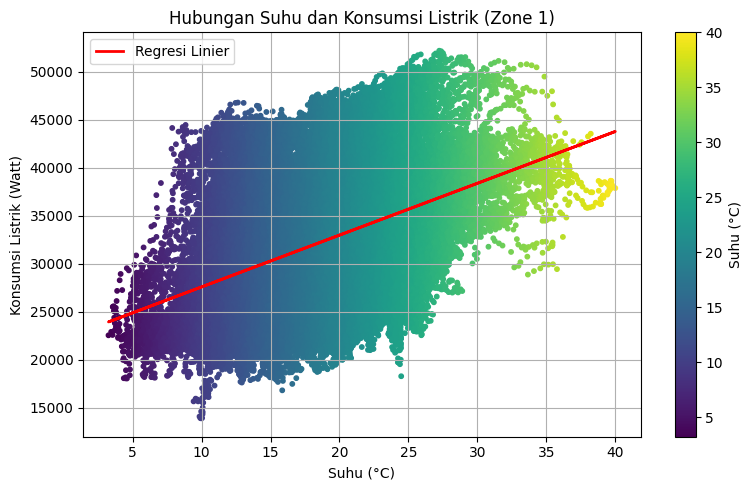

In [ ]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df['Temperature'], df['PowerConsumption_Zone1'],
                      c=df['Temperature'], cmap='viridis', s=10)
plt.colorbar(label='Suhu (°C)')

z = np.polyfit(df['Temperature'], df['PowerConsumption_Zone1'], 1)
p = np.poly1d(z)
plt.plot(df['Temperature'], p(df['Temperature']), color='red', linewidth=2, label='Regresi Linier')
plt.title('Hubungan Suhu dan Konsumsi Listrik (Zone 1)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsumsi Listrik (Watt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
average_temp = df['Temperature'].mean()
average_humidity = df['Humidity'].mean()
average_wind_speed = df['WindSpeed'].mean()

# Menampilkan hasil
print("Rata-rata Temperature: {:.2f} °C".format(average_temp))
print("Rata-rata Humidity: {:.2f}%".format(average_humidity))
print("Rata-rata Wind Speed: {:.2f} m/s".format(average_wind_speed))

# Alternatif: menghitung sekaligus dan menyimpan dalam DataFrame
average_stats = pd.DataFrame({
    'Metric': ['Temperature', 'Humidity', 'WindSpeed'],
    'Average Value': [
        df['Temperature'].mean(),
        df['Humidity'].mean(),
        df['WindSpeed'].mean()
    ],
    'Unit': ['°C', '%', 'm/s']
})

print("\nTabel Rata-rata:")
print(average_stats)


Rata-rata Temperature: 18.81 °C
Rata-rata Humidity: 68.26%
Rata-rata Wind Speed: 1.96 m/s

Tabel Rata-rata:
        Metric  Average Value Unit
0  Temperature      18.810024   °C
1     Humidity      68.259518    %
2    WindSpeed       1.959489  m/s
